## 머신러닝
# 4. 로지스틱 회귀
- Logistic Regression
- sigmoid 함수 적용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 정의
- 문제를 간단하게 하기 위해 iris 데이터에서 속성 2개만 사용하고, setosa 를 0 클래스로 나머지를 1 클래스로 지정한다

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
X = iris.data[:,:2]
y = iris.target.copy()
y[y>0] = 1

X.shape, y.shape

((150, 2), (150,))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

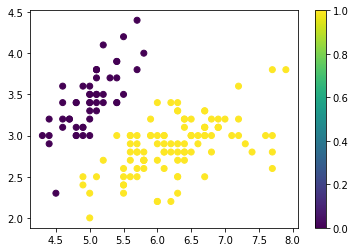

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

### LogisticRegression 모델

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

1.0

In [14]:
pred_y = model.predict(X)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

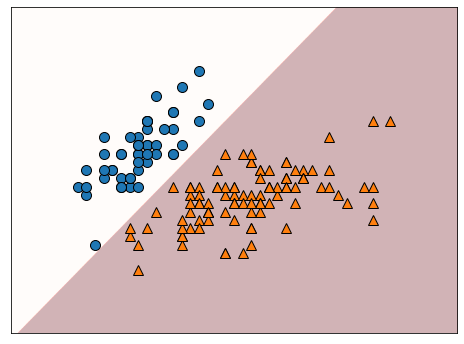

In [15]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

> - 로지스틱회귀는 경계를 항상 직선 또는 곧은 평면(초평면)으로 나눈다

In [16]:
model.coef_, model.intercept_ # w1, w2, b

(array([[ 3.38829757, -3.1645277 ]]), array([-8.32330389]))

In [18]:
model.predict_proba(X).round(2) # 소수점 2자리 까지의 확률값 출력

array([[0.89, 0.11],
       [0.77, 0.23],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.82, 0.18],
       [0.85, 0.15],
       [0.94, 0.06],
       [0.83, 0.17],
       [0.96, 0.04],
       [0.79, 0.21],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.89, 0.11],
       [0.74, 0.26],
       [0.96, 0.04],
       [0.69, 0.31],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.71, 0.29],
       [0.89, 0.11],
       [0.86, 0.14],
       [0.81, 0.19],
       [0.93, 0.07],
       [0.87, 0.13],
       [0.69, 0.31],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.68, 0.32],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.59, 0.41],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.83, 0.17],
       [0.96, 0.04],
       [0.95,

In [20]:
p = model.predict_proba(X)
p.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 시그모이드(sigmoid) 함수
$$ sigmoid(t) = {1 \over 1+e^{-t}} $$

In [21]:
def sigmoid(t):
    return 1/(1 + np.exp(-t))

In [22]:
sigmoid(0), sigmoid(1), sigmoid(-1), sigmoid(100), sigmoid(-100)

(0.5, 0.7310585786300049, 0.2689414213699951, 1.0, 3.7200759760208356e-44)

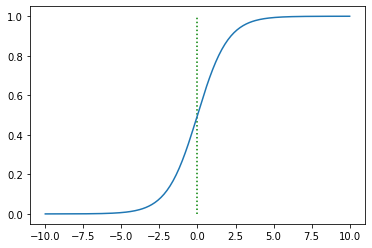

In [28]:
rng = np.arange(-10, 10.00001, 0.1)

plt.plot(rng, sigmoid(rng))
plt.vlines(0, 0, 1, linestyles=':', colors='g')

In [30]:
a = np.arange(-10,11)
sigmoid(a).round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.05, 0.12, 0.27, 0.5 ,
       0.73, 0.88, 0.95, 0.98, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  ])

### 비용함수 계산
$$ cross\_entropy = -y \cdot log(\hat{y}) - (1-y) \cdot log(1-\hat{y}) $$
$$ \hat{y} = sigmoid(X \cdot W + b) $$

In [34]:
W = model.coef_[0]
b = model.intercept_[0]

In [35]:
W, b

(array([ 3.38829757, -3.1645277 ]), -8.32330388643094)

In [36]:
y_hat = sigmoid(X@W + b)
y_hat

array([0.10727976, 0.22895365, 0.07413821, 0.07261677, 0.05873904,
       0.08563349, 0.02941115, 0.10515546, 0.06965993, 0.17789397,
       0.14991734, 0.05631297, 0.17464494, 0.03742736, 0.20927703,
       0.05050156, 0.08563349, 0.10727976, 0.2620747 , 0.04443856,
       0.31305159, 0.05998853, 0.01583712, 0.18453375, 0.05631297,
       0.2941321 , 0.10515546, 0.14430271, 0.18792485, 0.07413821,
       0.13359827, 0.31305159, 0.02463316, 0.04839822, 0.17789397,
       0.18119018, 0.31788378, 0.04257641, 0.05174097, 0.14156154,
       0.07887997, 0.41232104, 0.02816015, 0.07887997, 0.04443856,
       0.17464494, 0.04443856, 0.05398135, 0.11164182, 0.138864  ,
       0.994874  , 0.96214172, 0.99475861, 0.95408317, 0.99215461,
       0.89371993, 0.92956519, 0.66473957, 0.99232688, 0.6795313 ,
       0.90797266, 0.89789658, 0.99359672, 0.95961916, 0.81366948,
       0.9897305 , 0.7608926 , 0.94183779, 0.99673811, 0.93933717,
       0.82363375, 0.97024738, 0.99400997, 0.97024738, 0.98500

In [38]:
Loss = (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).sum()
Loss

13.860531241489259

In [42]:
eps = np.finfo(float).eps # epsilon
eps

2.220446049250313e-16

In [44]:
# log 함수에 0을 넣으면 오류가 발생한다. 그래서 epsilon 을 더해준다
Loss = (-y*np.log(y_hat+eps) - (1-y)*np.log(1-y_hat+eps)).sum()
Loss

13.86053124148922

### keras 적용

In [19]:
from tensorflow import keras

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [55]:
history = model.fit(X, y, epochs=500)

Epoch 1/500
5/5 [==============================] - 2s 7ms/step - loss: 2.1645 - acc: 0.3008
Epoch 2/500
5/5 [==============================] - 0s 19ms/step - loss: 1.2217 - acc: 0.3468
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7214 - acc: 0.3959
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.5193 - acc: 0.8267
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.4444 - acc: 0.9869
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 0.4099 - acc: 0.9711
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 0.4079 - acc: 0.9548
Epoch 8/500
5/5 [==============================] - 0s 7ms/step - loss: 0.3943 - acc: 0.9377
Epoch 9/500
5/5 [==============================] - 0s 6ms/step - loss: 0.3943 - acc: 0.8923
Epoch 10/500
5/5 [==============================] - 0s 7ms/step - loss: 0.3779 - acc: 0.8982
Epoch 11/500
5/5 [==============================] - 0s 6ms/step - loss: 0.382

5/5 [==============================] - 0s 7ms/step - loss: 0.2653 - acc: 0.9842
Epoch 175/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2550 - acc: 0.9847
Epoch 176/500
5/5 [==============================] - 0s 10ms/step - loss: 0.2618 - acc: 0.9890
Epoch 177/500
5/5 [==============================] - 0s 8ms/step - loss: 0.2662 - acc: 0.9834
Epoch 178/500
5/5 [==============================] - ETA: 0s - loss: 0.3239 - acc: 0.968 - 0s 8ms/step - loss: 0.2896 - acc: 0.9738
Epoch 179/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2765 - acc: 0.9716
Epoch 180/500
5/5 [==============================] - 0s 6ms/step - loss: 0.2751 - acc: 0.9799
Epoch 181/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2508 - acc: 0.9877
Epoch 182/500
5/5 [==============================] - 0s 12ms/step - loss: 0.2584 - acc: 0.9768
Epoch 183/500
5/5 [==============================] - 0s 8ms/step - loss: 0.2573 - acc: 0.9847
Epoch 184/500
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.2042 - acc: 0.9847
Epoch 347/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2001 - acc: 0.9965
Epoch 348/500
5/5 [==============================] - 0s 5ms/step - loss: 0.1943 - acc: 0.9912
Epoch 349/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2070 - acc: 0.9921
Epoch 350/500
5/5 [==============================] - 0s 7ms/step - loss: 0.2054 - acc: 0.9978
Epoch 351/500
5/5 [==============================] - 0s 5ms/step - loss: 0.2042 - acc: 0.9834
Epoch 352/500
5/5 [==============================] - 0s 8ms/step - loss: 0.1955 - acc: 0.9965
Epoch 353/500
5/5 [==============================] - 0s 8ms/step - loss: 0.1866 - acc: 0.9921
Epoch 354/500
5/5 [==============================] - 0s 8ms/step - loss: 0.2031 - acc: 0.9921
Epoch 355/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1975 - acc: 0.9921
Epoch 356/500
5/5 [==============================] - 0s 7ms/step - loss: 0

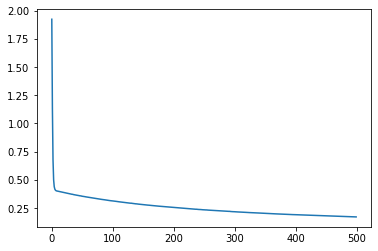

In [56]:
plt.plot(history.history['loss'])

In [58]:
model.get_weights()

[array([[ 1.7575803],
        [-2.8916545]], dtype=float32),
 array([-0.20336705], dtype=float32)]

In [64]:
pred_y = model.predict(X).ravel()
pred_y

array([0.20415932, 0.43384352, 0.23218128, 0.25300938, 0.13878453,
       0.12026888, 0.12453985, 0.22320396, 0.29821515, 0.3646236 ,
       0.19598892, 0.16817641, 0.39127788, 0.21069616, 0.17136002,
       0.05173793, 0.12026888, 0.20415932, 0.23623264, 0.09726453,
       0.36724377, 0.12577656, 0.07388738, 0.31385303, 0.16817641,
       0.4774081 , 0.22320396, 0.23420087, 0.28996044, 0.23218128,
       0.32495132, 0.36724377, 0.05118665, 0.0640665 , 0.3646236 ,
       0.33877432, 0.34130913, 0.11907917, 0.24140784, 0.25514954,
       0.1770801 , 0.7417222 , 0.15144554, 0.1770801 , 0.09726453,
       0.39127788, 0.09726453, 0.20233038, 0.16976234, 0.2772937 ,
       0.9451324 , 0.85715425, 0.9507251 , 0.94334865, 0.957883  ,
       0.8478979 , 0.79033226, 0.81287575, 0.95306253, 0.75557715,
       0.942742  , 0.81628746, 0.9816657 , 0.8939817 , 0.7778678 ,
       0.9313934 , 0.72394574, 0.89872444, 0.9870291 , 0.91758263,
       0.7136264 , 0.9184327 , 0.9744255 , 0.9184327 , 0.93458

In [65]:
((pred_y>0.5)==y).mean()

0.9933333333333333

### 학습/테스트 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

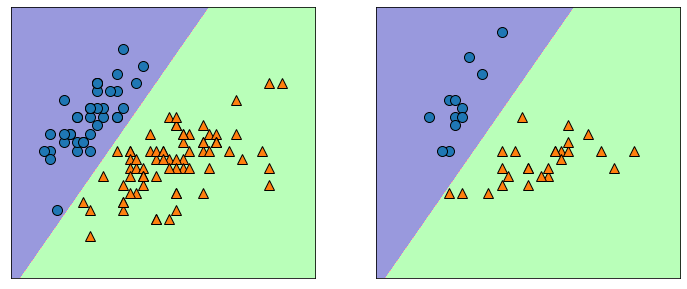

In [11]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.subplot(1,2,2)
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

### iris 전체 데이터 사용
- 클래스가 3개인 경우이다
- LogisticRegression 에서는 일대다 방식으로 결과를 낸다
> setosa 와 나머지, versicolor 와 나머지, virginica 와 나머지
- 신경망에서는 이런 경우, 주로 softmax 방식을 사용한다

In [13]:
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [15]:
model.coef_, model.intercept_

(array([[-0.42134267,  0.83731164, -2.30619692, -0.99262599],
        [ 0.45316032, -0.41646084, -0.18421706, -0.72106136],
        [-0.03181765, -0.4208508 ,  2.49041398,  1.71368736]]),
 array([  9.29980523,   2.398228  , -11.69803322]))

In [17]:
model.predict_proba(X).round(2)

array([[0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
 

- keras 적용 (참고)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(3, activation='softmax', input_shape=(4,)))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 6ms/step - loss: 2.5963 - acc: 0.3113
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 2.0274 - acc: 0.4135
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 1.7352 - acc: 0.5037
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 1.5583 - acc: 0.3506
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 1.2378 - acc: 0.4565
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1979 - acc: 0.4482
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1346 - acc: 0.3503
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0767 - acc: 0.4510
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0507 - acc: 0.3629
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0031 - acc: 0.4344
Epoch 11/500
4/4 [==============================] - 0s 8ms/step - loss: 0.9822 

4/4 [==============================] - 0s 8ms/step - loss: 0.4811 - acc: 0.9165
Epoch 90/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4808 - acc: 0.8693
Epoch 91/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4673 - acc: 0.8882
Epoch 92/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4817 - acc: 0.9429
Epoch 93/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4732 - acc: 0.8912
Epoch 94/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4868 - acc: 0.9341
Epoch 95/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4616 - acc: 0.8576
Epoch 96/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5139 - acc: 0.9250
Epoch 97/500
4/4 [==============================] - 0s 6ms/step - loss: 0.4942 - acc: 0.8454
Epoch 98/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4906 - acc: 0.8677
Epoch 99/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4769 - ac

4/4 [==============================] - 0s 6ms/step - loss: 0.3430 - acc: 0.9251
Epoch 262/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3540 - acc: 0.9348
Epoch 263/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3476 - acc: 0.9411
Epoch 264/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3629 - acc: 0.9576
Epoch 265/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3491 - acc: 0.9799
Epoch 266/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3480 - acc: 0.9757
Epoch 267/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3502 - acc: 0.9479
Epoch 268/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3433 - acc: 0.9432
Epoch 269/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3388 - acc: 0.9650
Epoch 270/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3695 - acc: 0.9421
Epoch 271/500
4/4 [==============================] - 0s 6ms/step - loss: 0

4/4 [==============================] - 0s 6ms/step - loss: 0.2990 - acc: 0.9737
Epoch 434/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2854 - acc: 0.9789
Epoch 435/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3045 - acc: 0.9705
Epoch 436/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2998 - acc: 0.9612
Epoch 437/500
4/4 [==============================] - ETA: 0s - loss: 0.2781 - acc: 0.968 - 0s 5ms/step - loss: 0.2895 - acc: 0.9613
Epoch 438/500
4/4 [==============================] - ETA: 0s - loss: 0.3171 - acc: 0.937 - 0s 6ms/step - loss: 0.3062 - acc: 0.9612
Epoch 439/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3021 - acc: 0.9540
Epoch 440/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2840 - acc: 0.9799
Epoch 441/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2995 - acc: 0.9726
Epoch 442/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2860 - acc: 0.979

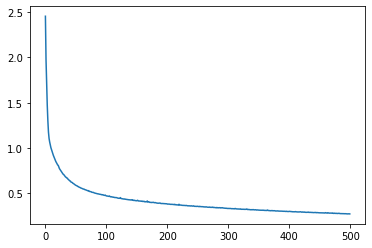

In [29]:
plt.plot(history.history['loss'])

In [30]:
model.get_weights()

[array([[ 0.41119635,  0.4710688 , -0.93868375],
        [ 1.4875562 , -0.10682365, -0.14880656],
        [-1.8696206 , -0.38783866,  1.1439865 ],
        [-0.9797555 , -0.29770648,  0.97128373]], dtype=float32),
 array([ 0.3155512 ,  0.11211938, -0.42767102], dtype=float32)]